**Survey of musical preferences between two cities: Moscov and Sain-Petersberg**

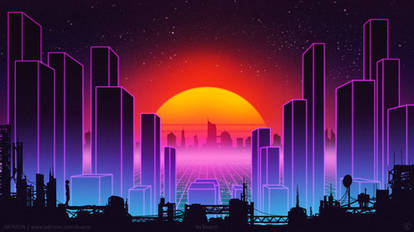

**Comparison Moscow and St. Petersburg is surrounded in myths. For example:**
 * Moscow — megapolis with hard rithm workweek;
 * Sain-Petersberg — cultural capital, with own style.

In accordance data of Yandex.music has been done comparison both capitals.

**Survey target** — check 3 gypothesis:
1. Users activity depends of day of the week. Moreover in Moscow and St. Petersburg this looks different.
2. On Monday morning, certain genres dominate in Moscow, while others dominate in St. Petersburg. Also, Friday evenings are dominated by different genres, depending on the city. 
3. Moscow and St. Petersburg prefer different genres of music. In Moscow, they listen to pop music more often, in St. Petersburg - Russian rap.

**Research progress**

 1. Data review.
 2. Data preprocessing.
 3. Hypothesis testing.



In [1]:
pip install jupyterthemes

In [2]:
!jt -l 

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [3]:
!jt -t chesterish

In [4]:
pip install jupyter_contrib_nbextensions 

Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install --yes -c conda-forget jupyter_conrib_nbextensions


Note: you may need to restart the kernel to use updated packages.



UnavailableInvalidChannel: The channel is not accessible or is invalid.
  channel name: conda-forget
  channel url: https://conda.anaconda.org/conda-forget
  error code: 404

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.




In [6]:
!jupyter nbextension enable toc2/main

Enabling notebook extension toc2/main...
      - Validating: ok


## Data review

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv(r"C:/Users/Vadim/Documents/Datasets/yandex_music_project.csv")

In [9]:
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


General information about data:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


So the table has seven columns. Data type in all columns — `object`.

**According to the data documentation:**
* `userID` - user ID;
* `Track` — track name;
* `artist` — artist name;
* `genre` — genre name;
* `City` - user's city;
* `time` - start time of listening;
* `Day` is the day of the week.

**There are three style violations in the column headings:**
1. Lowercase letters are combined with uppercase.
2. There are gaps.
3. `userID` needs to be written in snakecase: `user_id`



The number of values in the columns varies. This means there are missing values in the data.


**Conclusions**

Each line of the table contains data about the listened tracks. Some of the columns describe the composition itself: title, artist and genre. The rest of the data tells about the user: what city he is from, when he listened to music.

Preliminarily, it can be argued that there is enough data to test hypotheses. But there are gaps in the data, and discrepancies in the names of the columns with good style.


## Data preprocessing

### Heading style

In [11]:
df.columns # list of table column names

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

Column style correction:
* snake register
* lowercase characters
* filling gaps

In [12]:
df = df.rename(columns={'  userID': 'user_id', 'Track': 'track', '  City  ': 'city', 'Day': 'day', 'genre': 'music_genre', 'artist': 'artist_name'})# переименование столбцов

In [13]:
df.columns #checking results

Index(['user_id', 'track', 'artist_name', 'music_genre', 'city', 'time',
       'day'],
      dtype='object')

### Missing values

In [14]:
display(df.isna().sum().to_frame()) # count missing values

,0
user_id,0
track,1231
artist_name,7203
music_genre,1198
city,0
time,0
day,0


Not all missing values affect the research. So in `track` and `artist` the gaps are not important for this work. It suffices to replace them with explicit notation.

But omissions in `genre` can interfere with the comparison of musical tastes in Moscow and St. Petersburg. In practice, it would be correct to determine the cause of the gaps and restore the data. This option is not available in the curriculum. Therefore, you will have to:
* fill in these gaps with explicit notation,
* estimate how much they will damage the calculations. 

In [15]:
columns_to_replace = ['track', 'artist_name', 'music_genre']
for column in columns_to_replace:
    df[column] = df[column].fillna('unknown')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      65079 non-null  object
 1   track        65079 non-null  object
 2   artist_name  65079 non-null  object
 3   music_genre  65079 non-null  object
 4   city         65079 non-null  object
 5   time         65079 non-null  object
 6   day          65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Gaps are missing

### Duplicates

In [17]:
df.duplicated().sum() # counting explicit duplicates

3826

In [18]:
df = df.drop_duplicates().reset_index(drop=True)
display(df) # removal of explicit duplicates (with the removal of old indexes and the formation of new ones)

,user_id,track,artist_name,music_genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
...,...,...,...,...,...,...,...
61248,729CBB09,My Name,McLean,rnb,Moscow,13:32:28,Wednesday
61249,D08D4A55,Maybe One Day (feat. Black Spade),Blu & Exile,hip,Saint-Petersburg,10:00:00,Monday
61250,C5E3A0D5,Jalopiina,unknown,industrial,Moscow,20:09:26,Friday
61251,321D0506,Freight Train,Chas McDevitt,rock,Moscow,21:43:59,Friday


In [19]:
df.duplicated().sum() # check for duplicates

0

Now get rid of the implicit duplicates in the `genre` column. For example, the name of the same genre can be spelled slightly differently. Such errors will also affect the result of the study.

In [20]:
df['music_genre'].sort_values().unique() # view unique genre names

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '



There are implicit duplicates in the list:
* *hip*,
* *hop*,
* *hip-hop*.

In [21]:
def replace_wrong_genres(wrong_genres, correct_genre): # function to replace implicit duplicates
    for wrong_genre in wrong_genres:
        df['music_genre'] = df['music_genre'].replace(wrong_genre, correct_genre)
        


In [22]:
duplicates  = ['hip', 'hop', 'hip-hop']
title = 'hiphop'
replace_wrong_genres(duplicates, title) # eliminate Implicit Duplicates

In [23]:
df['music_genre'].sort_values().unique() # checking for implicit duplicates

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

**Conclusions**

Preprocessing found three problems in the data:

- headline style violations,
- missing values,
- duplicates - explicit and implicit.

Headings have been fixed to make the table easier to work with. Without duplicates, the study will become more accurate.

Missing values are replaced with `'unknown'`. It remains to be seen whether the gaps in the `genre` column will harm the study.

Now we can move on to hypothesis testing.

## Hypothesis testing

### Comparison of users behavior of two capitals

The first hypothesis states that users listen to music differently in Moscow and St. Petersburg. Let's check this assumption on the data on three days of the week - Monday, Wednesday and Friday. For this:

* Separate users of Moscow and St. Petersburg
* Compare how many tracks each group of users listened to on Monday, Wednesday and Friday.

In [24]:
df.groupby('city')[['city']].count()

,city
city,
Moscow,42741
Saint-Petersburg,18512


There are more auditions in Moscow than in St. Petersburg. It does not follow from this that Moscow users listen to music more often. There are simply more users in Moscow.

Now let's group the data by day of the week and count the plays on Monday, Wednesday, and Friday. 


In [25]:
df.groupby('day')[['day']].count()

,day
day,
Friday,21840
Monday,21354
Wednesday,18059


On average, users from the two cities are less active on Wednesdays. But the picture may change if we consider each city separately.

Now write a function that combines these two calculations

In [26]:
def number_tracks(day, city):
    track_list = df[df['day'] == day] 
    track_list = track_list[track_list['city'] == city]
    track_list_count = track_list['user_id'].count()
    return track_list_count

# function for counting plays for a specific city and day.
# using sequential filtering with logical indexing, it
# first get the rows with the desired day from the source table,
# then from the result it will filter the rows with the desired city,
# the count() method will count the number of values in the user_id column.
# This is the number the function will return as a result

In [27]:
print(number_tracks('Monday','Moscow')) # number of listenings in Moscow on Mondays

15740


In [28]:
print(number_tracks('Monday','Saint-Petersburg')) # number of listenings in St. Petersburg on Mondays

5614


In [29]:
print(number_tracks('Wednesday','Moscow')) # number of listenings in Moscow on Wednesdays

11056


In [30]:
print(number_tracks('Wednesday','Saint-Petersburg')) # number of listenings in St. Petersburg on Wednesdays

7003


In [31]:
print(number_tracks('Friday','Moscow')) # number of listenings in Moscow on Fridays

15945


In [32]:
print(number_tracks('Friday','Saint-Petersburg')) # number of listenings in St. Petersburg on Fridays

5895


In [33]:

moscow_spb_listening = pd.DataFrame(data=[['Moscow', 15740, 11056, 15945], ['Saint-Petersburg', 5614, 7003, 5895]], columns=['city', 'monday', 'wednesday', 'friday'])# Таблица с результатами
display(moscow_spb_listening)

,city,monday,wednesday,friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


**Conclusions**

The data shows the difference in user behavior:

- In Moscow, the peak of listening falls on Monday and Friday, and on Wednesday there is a noticeable decline.
- In St. Petersburg, on the contrary, they listen to music more on Wednesdays. Activity on Monday and Friday here is almost equally inferior to Wednesday.

So the data support the first hypothesis.

### Music at the beginning and end of the week

According to the second hypothesis, on Monday morning certain genres predominate in Moscow, while others dominate in St. Petersburg. Similarly, Friday evenings are dominated by different genres, depending on the city.

In [34]:
moscow_general = df[df['city'] == 'Moscow'] # getting the moscow_general table from those rows of the df table,
# for which the value in the 'city' column is 'Moscow'

In [35]:
spb_general = df[df['city'] == 'Saint-Petersburg'] # getting the spb_general table from those rows of the df table,
# for which the value in the 'city' column is 'Saint-Petersburg'

Creating the genre_weekday() function. The function should return information about the top 10 genres of those tracks that were listened to on the specified day, in the interval between two timestamps.

In [36]:
def genre_weekday(table, day, time1, time2):# Declaring the function genre_weekday() with parameters table, day, time1, time2,
# which returns information about the most popular genres on the specified day in
# given time:
     # 1) the genre_df variable saves those rows of the transmitted dataframe table, for
# of which at the same time:
    genre_df = table[table['day'] == day] # - the value in the day column is equal to the value of the day argument
    genre_df = genre_df[genre_df['time'] > time1] # - the value in the time column is greater than the value of the time1 argument
    genre_df = genre_df[genre_df['time'] < time2] # - the value in the time column is less than the value of the time2 argument

    genre_df_count = genre_df.groupby('music_genre')['music_genre'].count() # 2) group dataframe genre_df by genre column, take one of its
# columns and use the count() method to count the number of entries for each
# of present genres, write the resulting Series to a variable
#genre_df_count
    genre_df_sorted = genre_df_count.sort_values(ascending=False) # 3) sort genre_df_count in descending order of occurrence and save
# into the genre_df_sorted variable
    return genre_df_sorted.head(10) # 4) return a Series of the first 10 genre_df_sorted values, these will be the top 10
# popular genres (on the specified day, at the specified time)

Comparing the results of the genre_weekday() function for Moscow and St. Petersburg on Monday morning (from 7:00 to 11:00) and Friday evening (from 17:00 to 23:00): 

In [37]:
genre_weekday(moscow_general, 'Monday', '07:00', '11:00').to_frame() # function call for Monday morning in Moscow

,music_genre
music_genre,
pop,781
dance,549
electronic,480
rock,474
hiphop,286
ruspop,186
world,181
rusrap,175
alternative,164


In [38]:
genre_weekday(spb_general, 'Monday', '07:00', '11:00').to_frame() # function call for Monday morning in St. Petersburg

,music_genre
music_genre,
pop,218
dance,182
rock,162
electronic,147
hiphop,80
ruspop,64
alternative,58
rusrap,55
jazz,44


In [39]:
genre_weekday(moscow_general, 'Friday', '17:00', '23:00').to_frame()# function call for Friday evening in Moscow

,music_genre
music_genre,
pop,713
rock,517
dance,495
electronic,482
hiphop,273
world,208
ruspop,170
alternative,163
classical,163


In [40]:
genre_weekday(spb_general, 'Friday', '17:00', '23:00').to_frame()# function call for Friday evening in St. Petersburg

,music_genre
music_genre,
pop,256
electronic,216
rock,216
dance,210
hiphop,97
alternative,63
jazz,61
classical,60
rusrap,59


**Conclusions**

If we compare the top 10 genres on Monday morning, we can draw the following conclusions:

1. In Moscow and St. Petersburg they listen to similar music. The only difference is that the Moscow rating includes the “world” genre, while the St. Petersburg rating includes jazz and classical.

2. There were so many missing values ​​in Moscow that the value `'unknown'` took tenth place among the most popular genres. This means that missing values ​​occupy a significant share in the data and threaten the reliability of the study.

Friday night does not change this picture. Some genres rise a little higher, others go down, but overall the top 10 stays the same.

Thus, the second hypothesis was only partially confirmed:
* Users listen to similar music at the beginning of the week and at the end.
* The difference between Moscow and St. Petersburg is not very pronounced. In Moscow, they listen to Russian popular music more often, in St. Petersburg - jazz.

However, gaps in the data cast doubt on this result. There are so many of them in Moscow that the top 10 ranking could look different if it were not for the lost genre data.

### Genre preferences in Moscow and St. Petersburg

Hypothesis: St. Petersburg is the capital of rap, the music of this genre is listened to more often than in Moscow. And Moscow is a city of contrasts, which, nevertheless, is dominated by pop music.

In [41]:
moscow_genres = moscow_general.groupby('music_genre')['music_genre'].count().sort_values(ascending=False)
# counting the number of 'genre' in values in this grouping using the count() method,
# sort the resulting Series in descending order and save to moscow_genres

In [42]:
moscow_genres.to_frame().head(10) # counting the number of 'genre' in Moscow

,music_genre
music_genre,
pop,5892
dance,4435
rock,3965
electronic,3786
hiphop,2096
classical,1616
world,1432
alternative,1379
ruspop,1372


In [43]:
spb_genres = spb_general.groupby('music_genre')['music_genre'].count().sort_values(ascending=False)  
# counting the number of 'genre' in values in this grouping using the count() method,
# sort the resulting Series in descending order and save to moscow_genres

In [44]:
spb_genres.to_frame().head(10) # counting the number of 'genre' in St. Petersburg

,music_genre
music_genre,
pop,2431
dance,1932
rock,1879
electronic,1736
hiphop,960
alternative,649
classical,646
rusrap,564
ruspop,538


**Conclusions**
The hypothesis was partially confirmed:
* Pop music is the most popular genre in Moscow, as the hypothesis suggested. Moreover, in the top 10 genres there is a close genre - Russian popular music.
* Contrary to expectations, rap is equally popular in Moscow and St. Petersburg. 


## Research results

The study tested three hypotheses:

1. The day of the week has a different effect on the activity of users in Moscow and St. Petersburg.

The first hypothesis was fully confirmed.

2. Musical preferences do not change much during the week - be it Moscow or St. Petersburg. Small differences are noticeable at the beginning of the week, on Mondays:
* in Moscow they listen to music of the “world” genre,
* in St. Petersburg - jazz and classical music.

Thus, the second hypothesis was only partly confirmed. This result could have been different were it not for gaps in the data.

3. The tastes of users of Moscow and St. Petersburg have more in common than differences. Contrary to expectations, genre preferences in St. Petersburg resemble those in Moscow.

The third hypothesis was not confirmed. If there are differences in preferences, they are invisible to the bulk of users.